# Heatmap: Visualizing a Graph

This example shows how to visualize graphs using a heatmap.

In [1]:
import graspologic

import numpy as np
%matplotlib inline

/opt/hostedtoolcache/Python/3.8.13/x64/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Plotting graphs using heatmap

### Simulate graphs using weighted stochastic block models
The 2-block model is defined as below:

\begin{align*}
P = \begin{bmatrix}0.8 & 0.2 \\
0.2 & 0.8 
\end{bmatrix}
\end{align*}

We generate two weight SBMs where the weights are distributed from a Poisson(3) and Normal(5, 1).

In [2]:
from graspologic.simulations import sbm

n_communities = [50, 50]
p = [[0.8, 0.2], 
     [0.2, 0.8]]

wt = np.random.poisson
wtargs = dict(lam=3)
A_poisson= sbm(n_communities, p, wt=wt, wtargs=wtargs)

wt = np.random.normal
wtargs = dict(loc=5, scale=1)
A_normal = sbm(n_communities, p, wt=wt, wtargs=wtargs)

## Plot the simulated weighted SBMs

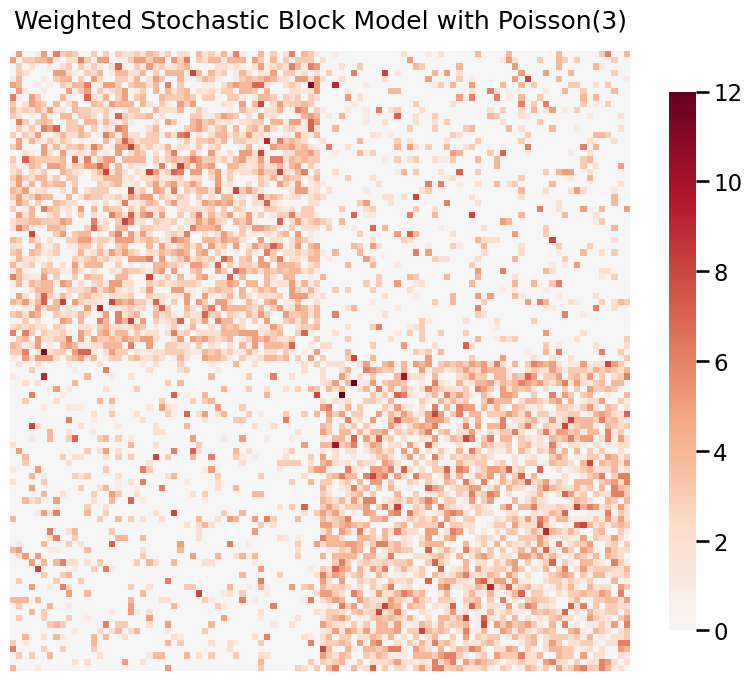

In [3]:
from graspologic.plot import heatmap

title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= heatmap(A_poisson, title=title)

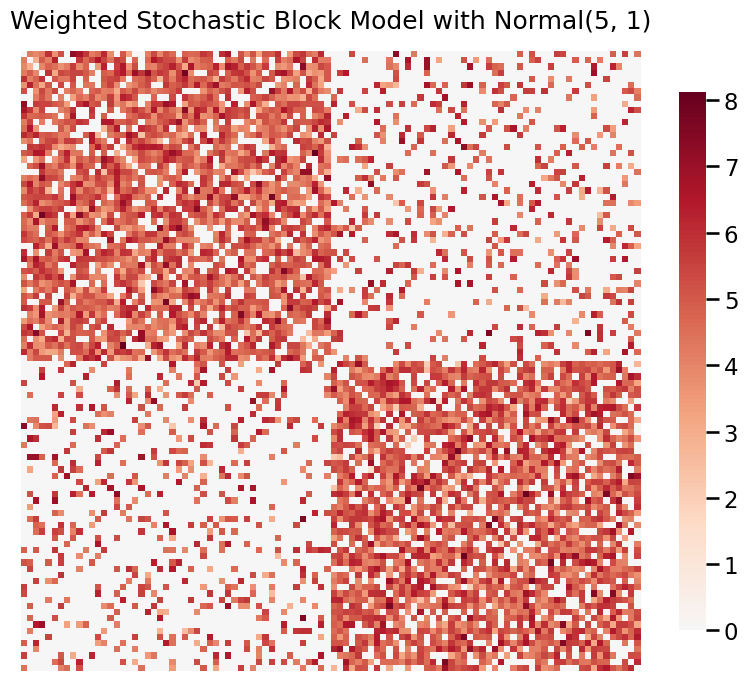

In [4]:
title = 'Weighted Stochastic Block Model with Normal(5, 1)'

fig= heatmap(A_normal, title=title)

### You can also change color maps

See [here](https://matplotlib.org/tutorials/colors/colormaps.html) for a list of colormaps

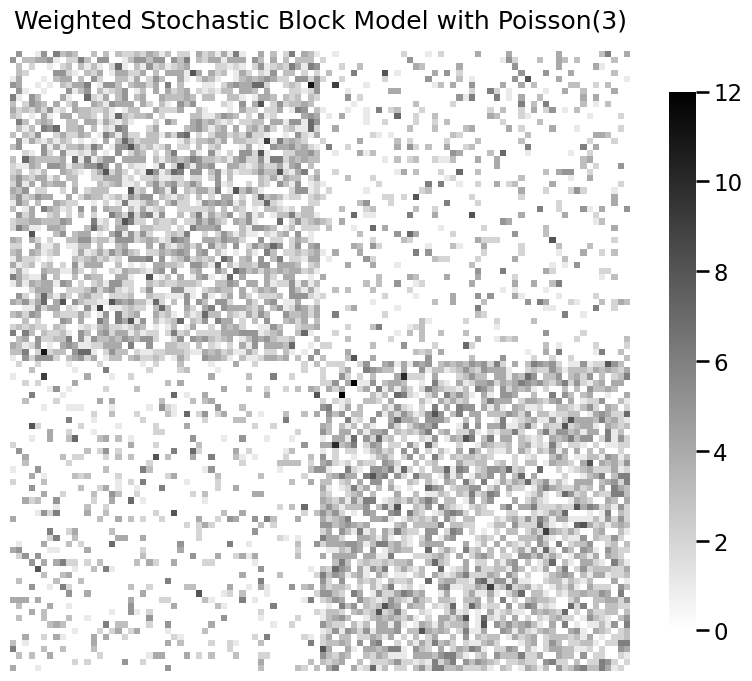

In [5]:
title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= heatmap(A_poisson, title=title, transform=None, cmap="binary", center=None)

## Data transformations

When your graphs have values that span a large range, it is often useful to transform the data in order to visualize it properly. Below, we use a real graph which is estimated from the a structural MRI scan. The data is provided by [HNU1](http://dx.doi.org/10.15387/fcp_indi.corr.hnu1). 

The data ranges from 0 to 44813, and visualizing without a transformation will emphasize the large weights. Both log and pass-to-ranks transforms provide better visualizations of the graph.

In [6]:
G = np.load('./data/sub-0025427_ses-1_dwi_desikan.npy')

print((np.min(G), np.max(G)))

(0.0, 44813.0)


### Without transform

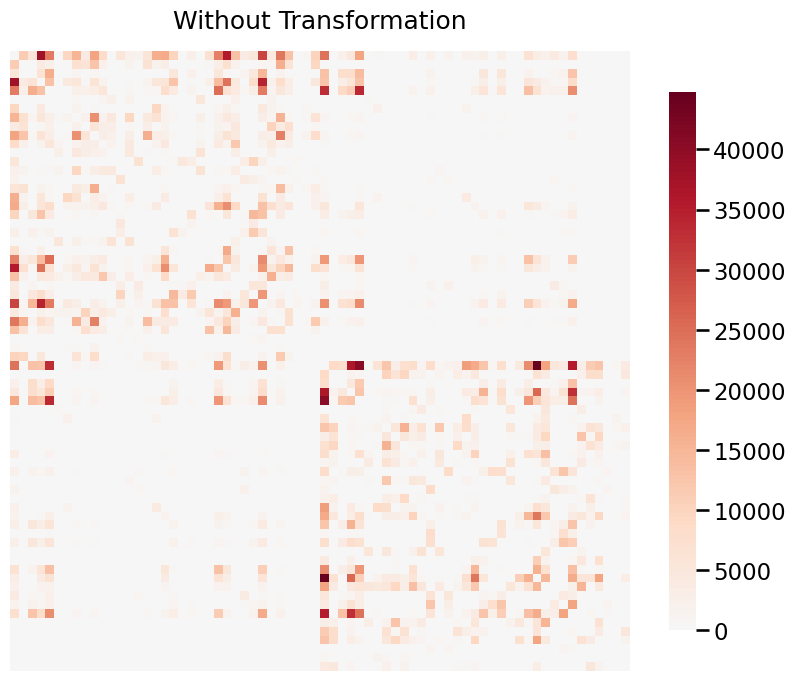

In [7]:
title = 'Without Transformation'
fig= heatmap(G, title=title, transform=None)

### With log transform

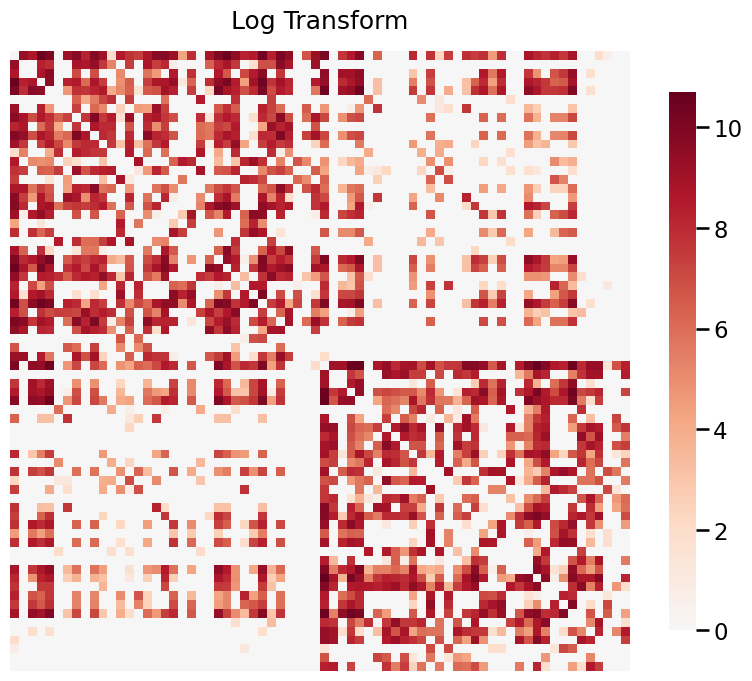

In [8]:
title = 'Log Transform'
fig= heatmap(G, title=title, transform='log')

### With pass to ranks

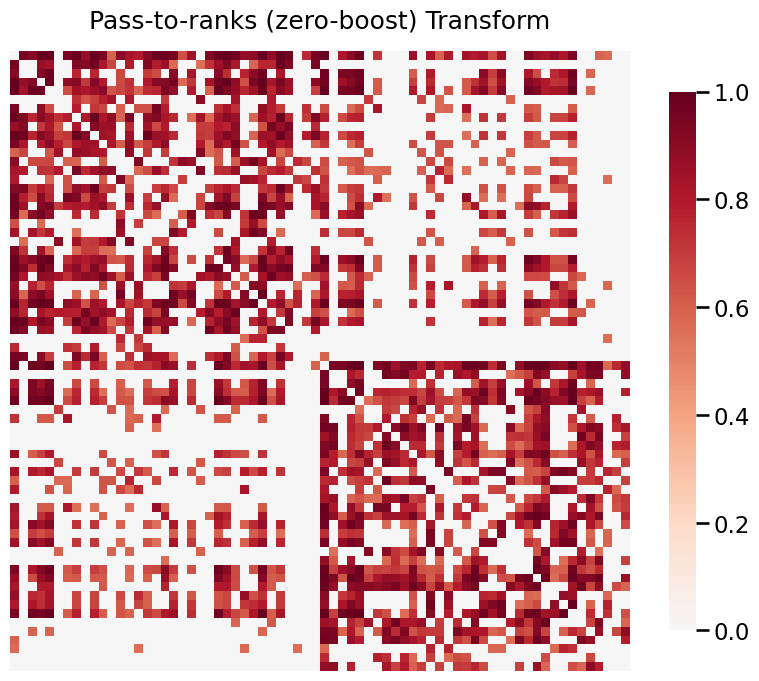

In [9]:
title = 'Pass-to-ranks (zero-boost) Transform'
fig= heatmap(G, title=title, transform='zero-boost')